# Import libraries

In [1]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

# Reading dataset

In [2]:
df=pd.read_csv("C:\\Users\\natiq\\Desktop\\Automobile Dataset\\Automobile_data.csv", na_values=['?', ' ?', '? '])

In [3]:
data=df.copy()

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
df.shape

(205, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Summary of Dataset

In [8]:
print(f'Row numbers: {df.shape[0]}')
print(f'column numbers: {df.shape[1]}')
print(f'Missing values: {df.isnull().sum().sum()}')

Row numbers: 205
column numbers: 26
Missing values: 59


In [9]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17


# Missing values

In [10]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<AxesSubplot:>

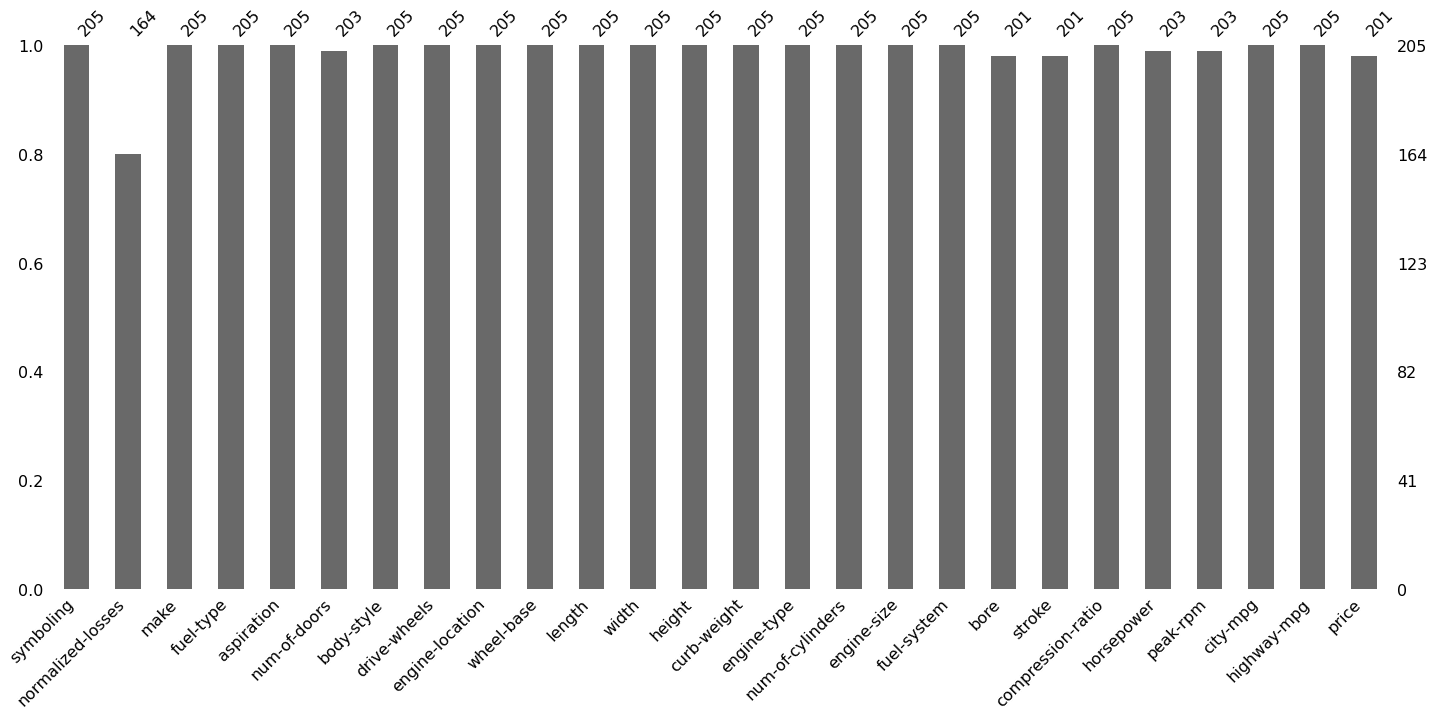

In [11]:
msno.bar(df)

In [12]:
total=df.isnull().sum().sort_values(ascending=False)
percentage=((total/df.shape[0])*100).sort_values(ascending=False)
missing_data=pd.concat([total, percentage], axis=1, keys=['total', 'percentage'])

In [13]:
missing_data.head(10)

,total,percentage
normalized-losses,41,20.00000
price,4,1.95122
stroke,4,1.95122
bore,4,1.95122
peak-rpm,2,0.97561
num-of-doors,2,0.97561
horsepower,2,0.97561
engine-type,0,0.00000
highway-mpg,0,0.00000
city-mpg,0,0.00000


In [14]:
missing_columns=missing_data[missing_data['percentage']>0.05].index

In [15]:
print(missing_columns)

Index(['normalized-losses', 'price', 'stroke', 'bore', 'peak-rpm',
       'num-of-doors', 'horsepower'],
      dtype='object')


In [16]:
df.drop("normalized-losses",axis=1,inplace=True)

In [17]:
df.drop(df[df['price'].isnull()].index,inplace=True)

In [18]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [19]:
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [20]:
df['num-of-doors'].replace({'four':4, 'two':2}, inplace=True)

In [21]:
df['num-of-doors'].value_counts()

4.0    113
2.0     86
Name: num-of-doors, dtype: int64

In [22]:
#filling missing value using fillna
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df['bore'].fillna(df['bore'].mean(), inplace=True)
df['stroke'].fillna(df['stroke'].mean(), inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].mode()[0], inplace=True)

In [23]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Exploratory Data Analysis

# Variable Analysis

In [24]:
for col in df.columns:
    print(f'########################{col}######################')
    print(df[col].value_counts())

########################symboling######################
 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
########################make######################
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64
########################fuel-type######################
gas       181
diesel     20
Name: fuel-type, dtype: int64
########################aspiration######################
std      165
turbo     36
Name: aspiration, dtype: int64
########################num-of-doors######################
4.0    115
2.0     86
Name: num-of-doors, dtype: int64
##

In [25]:
df['symboling'] = df['symboling'].astype('object')

In [26]:
df['num-of-doors']=df['symboling'].astype(int)

# Correlation

In [27]:
df.corr()

,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
num-of-doors,1.000000,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.278269,-0.035527,0.036233,-0.082391
wheel-base,-0.535987,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.356502,-0.470606,-0.543304,0.584642
length,-0.365404,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.288075,-0.665192,-0.698142,0.690628
width,-0.242423,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.247401,-0.633531,-0.680635,0.751265
height,-0.550160,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086941,-0.306757,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.757994,-0.278278,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822649,-0.257012,-0.650546,-0.679571,0.872335
bore,-0.139896,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566838,-0.269953,-0.582121,-0.591390,0.543154
stroke,-0.007992,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097815,-0.077068,-0.034079,-0.034741,0.082267
compression-ratio,-0.182196,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001250,0.187854,1.000000,-0.214431,-0.432349,0.331425,0.268465,0.071107


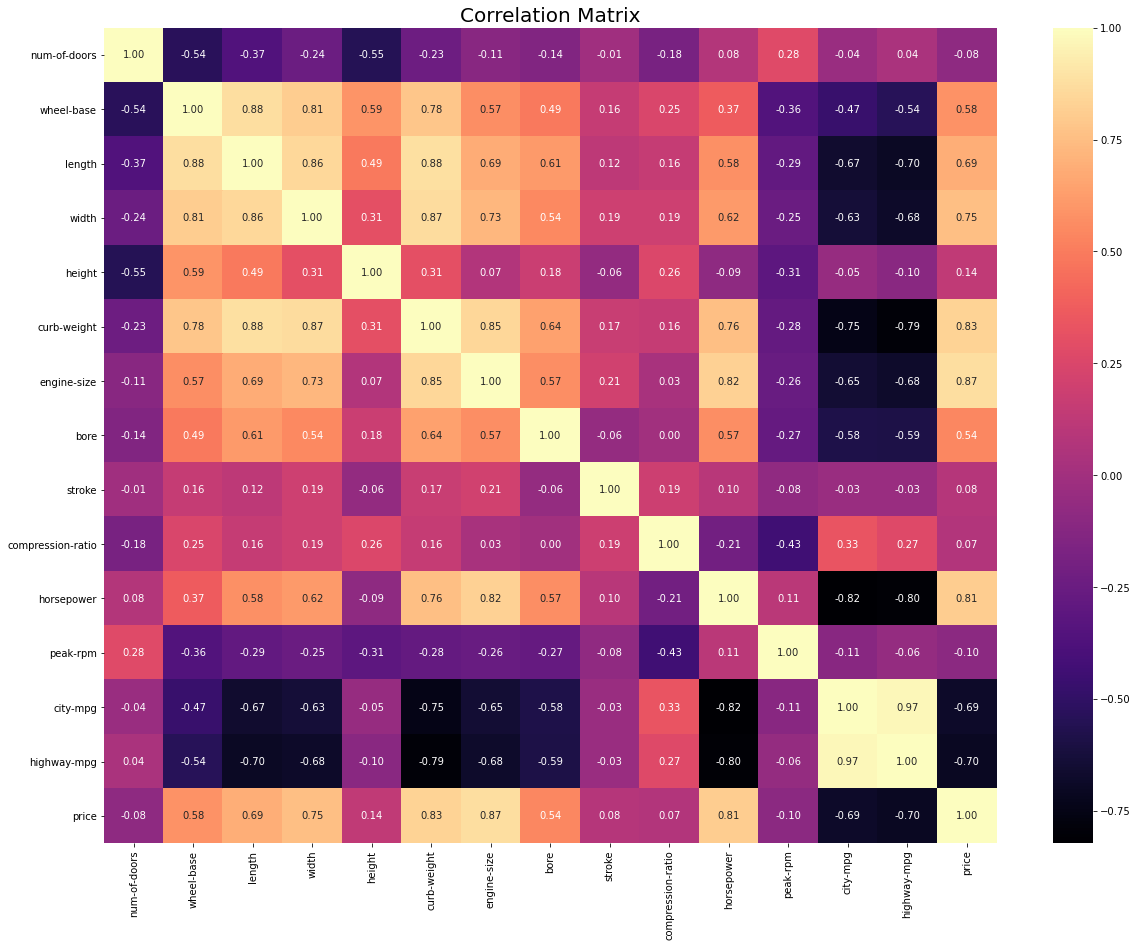

In [28]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Numerical Variable Analysis

In [29]:
#finding numeric column from data
num_cols=list(df._get_numeric_data().columns)
print(f"Numeric variable numbers: {len(num_cols)}")

Numeric variable numbers: 15


In [30]:
def hist_for_nums(df, num_cols):
    for col in num_cols:
        df[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()

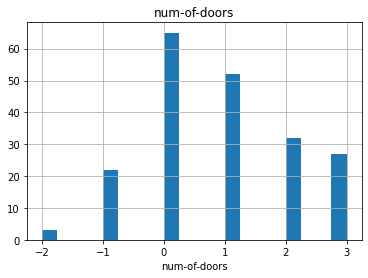

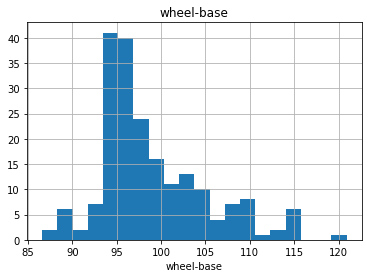

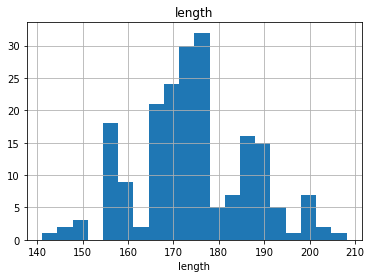

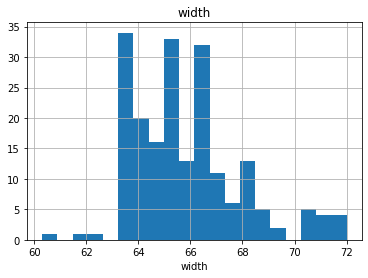

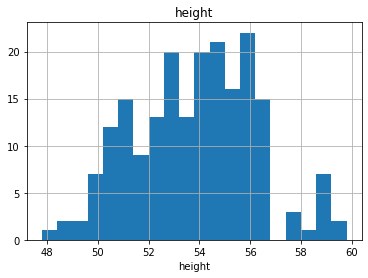

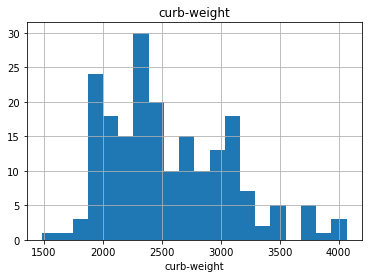

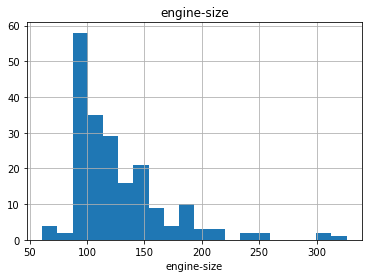

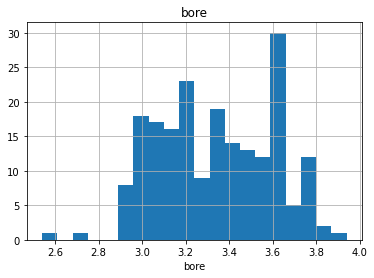

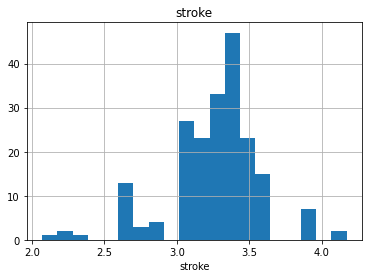

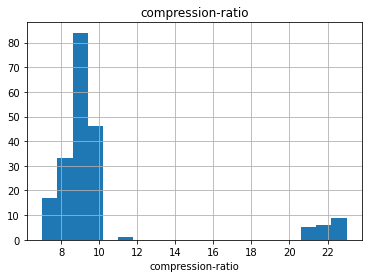

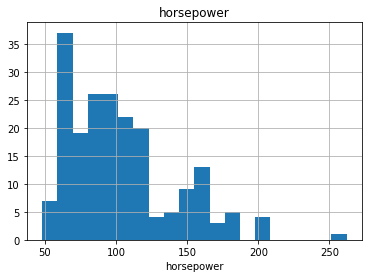

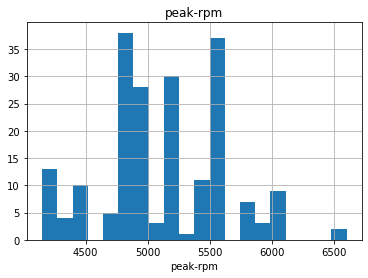

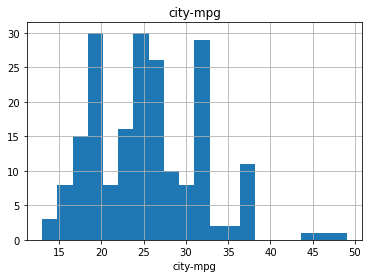

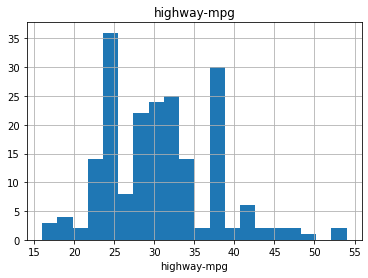

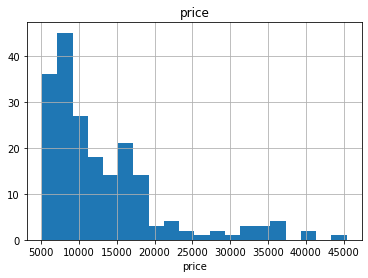

In [31]:
hist_for_nums(df, num_cols)

# Categorical Variable Analysis

In [32]:
cat_cols=list(set(df.columns)-set(num_cols))
print(f"Categoric variable numbers: {len(cat_cols)}")

Categoric variable numbers: 10


In [33]:
#count total value in every catgorical feature
for col in cat_cols:
    print(f'##########{col}##########')
    print(df[col].value_counts(normalize=True))

##########make##########
toyota           0.159204
nissan           0.089552
mazda            0.084577
honda            0.064677
mitsubishi       0.064677
volkswagen       0.059701
subaru           0.059701
volvo            0.054726
peugot           0.054726
dodge            0.044776
mercedes-benz    0.039801
bmw              0.039801
plymouth         0.034826
saab             0.029851
audi             0.029851
porsche          0.019900
alfa-romero      0.014925
chevrolet        0.014925
jaguar           0.014925
isuzu            0.009950
renault          0.009950
mercury          0.004975
Name: make, dtype: float64
##########aspiration##########
std      0.820896
turbo    0.179104
Name: aspiration, dtype: float64
##########fuel-type##########
gas       0.900498
diesel    0.099502
Name: fuel-type, dtype: float64
##########engine-location##########
front    0.985075
rear     0.014925
Name: engine-location, dtype: float64
##########symboling##########
 0    0.323383
 1    0.258706
 2    

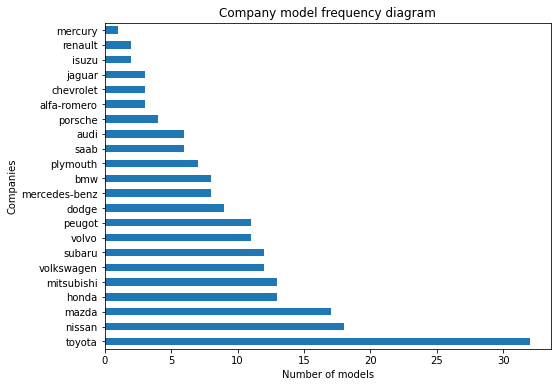

In [34]:
plt.figure(figsize=(8,6))
df['make'].value_counts().plot(kind='barh')
plt.xlabel('Number of models')
plt.ylabel('Companies')
plt.title("Company model frequency diagram")
plt.show()

# Outliers

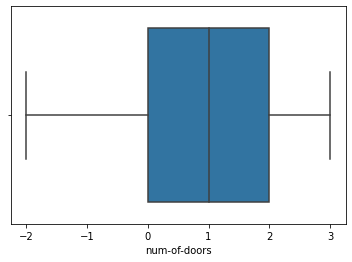

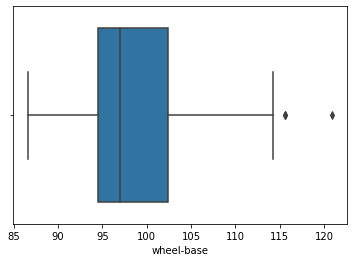

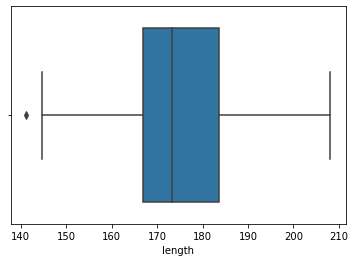

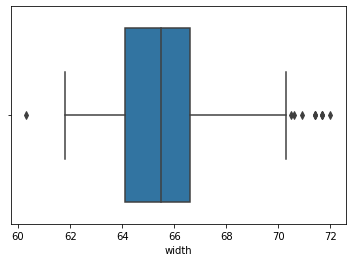

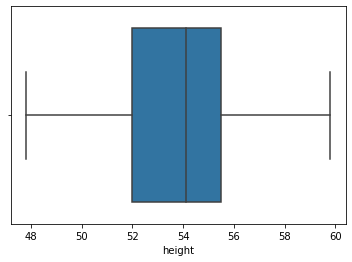

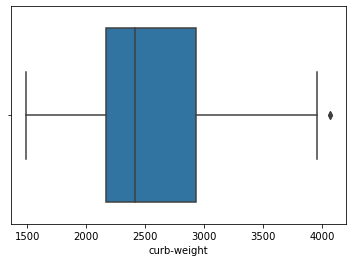

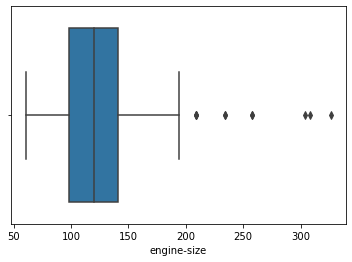

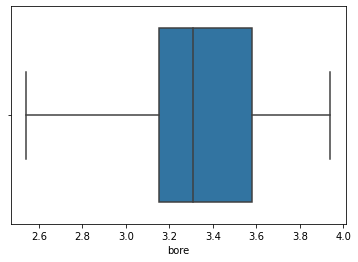

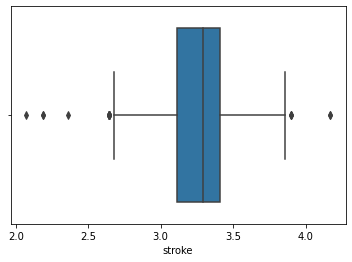

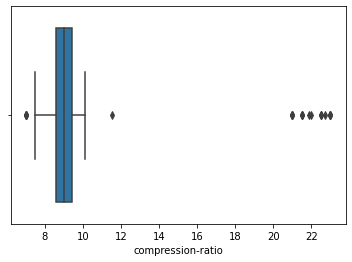

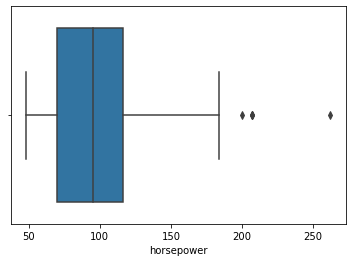

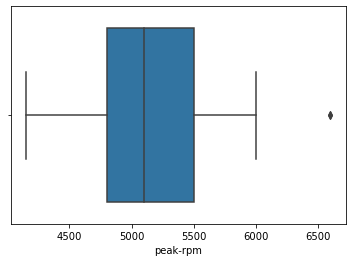

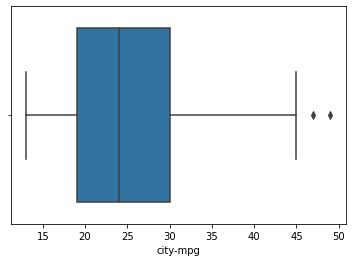

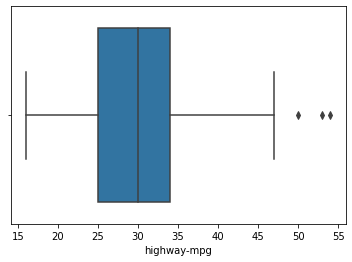

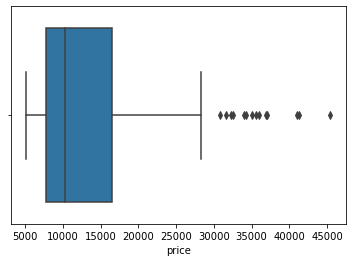

In [35]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

In [36]:
def outliers(df, num_cols):
    for col in num_cols:
        Q1=df[col].quantile(0.05)
        Q3=df[col].quantile(0.95)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        df.loc[df[col]<lower_bound, col]=lower_bound
        df.loc[df[col]>upper_bound, col]=upper_bound
    return df

In [37]:
df=outliers(df, num_cols)

# Dependent variable analysis

<AxesSubplot:xlabel='price', ylabel='Density'>

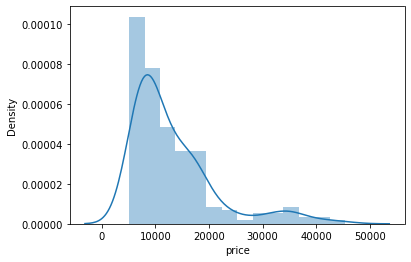

In [38]:
sns.distplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

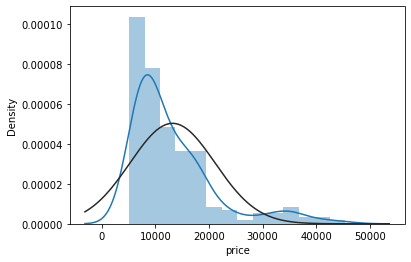

In [39]:
sns.distplot(df['price'], fit=norm)

In [40]:
print("Skewness coeff. is: %f" % df['price'].skew())
print("Kurtosis coeff. is: %f" % df['price'].kurt())

Skewness coeff. is: 1.809675
Kurtosis coeff. is: 3.231537


In [41]:
df['price']=np.log1p(df['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

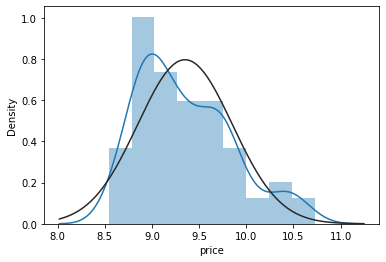

In [42]:
sns.distplot(df['price'], fit=norm)

# Independent variable analysis

In [43]:
skewed_feats = df[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [44]:
skewed_feats

compression-ratio    2.565135
engine-size          1.964344
horsepower           1.138640
wheel-base           1.023549
width                0.868485
curb-weight          0.700525
city-mpg             0.675345
price                0.673653
highway-mpg          0.545398
num-of-doors         0.195894
length               0.153291
peak-rpm             0.123667
height               0.028955
bore                -0.032700
stroke              -0.695439
dtype: float64

# Scaling numerical values using Standard Scaler

In [45]:
numerical=num_cols[:-1]
scaler = MinMaxScaler()
df[numerical]=scaler.fit_transform(df[numerical])

# Encode categorical features

In [46]:
df=pd.get_dummies(df, drop_first=True)

In [47]:
df.head()

,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0,0,0,0,0,0,0,1,0,0
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0,0,0,0,0,0,0,1,0,0
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0,0,0,0,0,0,0,1,0,0


# Spliting data for X and Y

In [48]:
X=df.drop('price', axis=1)
Y=df[['price']]

In [49]:
X

,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,...,0,0,0,0,0,0,0,1,0,0
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,...,0,0,0,0,0,0,0,1,0,0
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,...,0,0,0,0,0,0,0,1,0,0
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,...,0,0,0,0,0,0,0,1,0,0
201,0.2,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,...,0,0,0,0,0,0,0,1,0,0
202,0.2,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,...,0,0,0,0,0,0,0,1,0,0
203,0.2,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,...,0,0,0,0,0,1,0,0,0,0


# Model

In [50]:
def model(X, Y, algo, split_share=0.33):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=split_share)
    m=algo().fit(X_train, Y_train)
    train_rmse=np.sqrt(mean_squared_error(Y_train, m.predict(X_train)))
    test_rmse=np.sqrt(mean_squared_error(Y_test, m.predict(X_test)))
    return (type(algo()).__name__, train_rmse, test_rmse)

In [51]:
models=[LinearRegression, Lasso, Ridge, ElasticNet]
results={'model':[], 'train_rmse':[], 'test_rmse':[]}
for algo in models:
    res=model(X, Y, algo)
    results['model'].append(res[0])
    results['train_rmse'].append(res[1])
    results['test_rmse'].append(round(res[2], 5))

In [52]:
results=pd.DataFrame(results)
results

,model,train_rmse,test_rmse
0,LinearRegression,0.081296,0.15437
1,Lasso,0.460568,0.57328
2,Ridge,0.103912,0.14486
3,ElasticNet,0.460568,0.57328


<AxesSubplot:ylabel='model'>

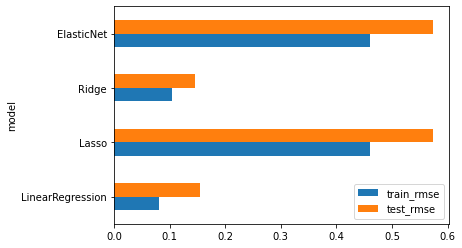

In [53]:
results.set_index('model').plot(kind='barh')

# Model tuning

In [54]:
def model_tuning(X, Y, algo, algo_cv, grid, split_share=0.33, cv=10):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=split_share)
    model_cv=algo_cv(alphas=grid, cv=cv)
    model_cv.fit(X_train, Y_train)
    model_tuned=algo(alpha=model_cv.alpha_)
    model_tuned.fit(X_train, Y_train)
    train_rmse=np.sqrt(mean_squared_error(Y_train, model_tuned.predict(X_train)))
    test_rmse=np.sqrt(mean_squared_error(Y_test, model_tuned.predict(X_test)))
    return (type(algo()).__name__, train_rmse, test_rmse) 

In [55]:
models={Ridge: RidgeCV, Lasso:LassoCV, ElasticNet:ElasticNetCV}
results_tuned={'model':[], 'train_rmse':[], 'test_rmse':[]}
alphas = [0.1,0.01, 0.005, 0.05, 0.001,0.2,0.3,0.5,0.8,0.9]
for model in models:
    res=model_tuning(X, Y, model, models[model], alphas)
    results_tuned['model'].append(res[0])
    results_tuned['train_rmse'].append(res[1])
    results_tuned['test_rmse'].append(res[2])

In [56]:
results_tuned=pd.DataFrame(results_tuned)
results_tuned

,model,train_rmse,test_rmse
0,Ridge,0.102778,0.143824
1,Lasso,0.102869,0.133233
2,ElasticNet,0.122399,0.163644


<AxesSubplot:ylabel='model'>

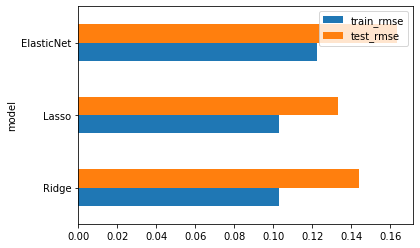

In [57]:
results_tuned.set_index('model').plot(kind='barh')